In [3]:
%run "C:/Users/blake/PMT/PyPMT.ipynb"
# replace with wherever you have PyPMT.py stored

Example 1: antbounds with circleps, geoquadps, and scarlabel

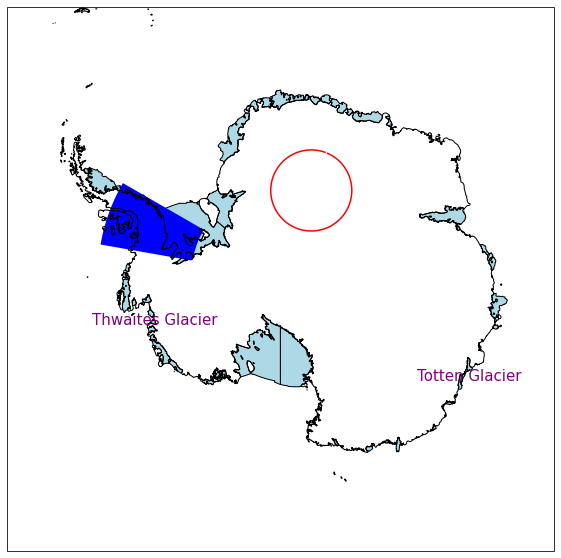

In [2]:
# Create the map and axes using antbounds function
ax = ant_bounds()

# Draw the center circle
#circleps(ax, lons=20, lats=-80, radii=500, km = True, edgecolor='r', fill = False, alpha=0.9)
circle_ps(ax, lons = 20, lats = -80, radii = 500, km=True, color='r')

# label Totten Glacier and Thwaites
scar_label(ax, ['Totten Glacier', 'Thwaites Glacier'], color = 'purple', fontsize = 15)

# Draw a shape w/ geoquadps
latlim = [-80, -70]
lonlim = [-80, -60]
geoquad_ps(ax, latlim, lonlim, color='b', linewidth=2)

# Show the plot
plt.show()

Example 2: antbounds with scatterps (used to take in a list or a single point)

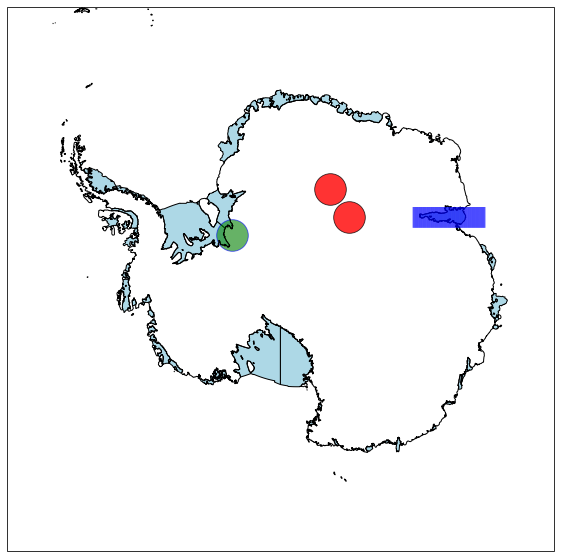

In [3]:
# Generate some random data
lat = [-80, -79]
lon = [50, 30]

# Create the map
ax = ant_bounds()

# Plot the points on the map
scatter_ps(ax, lat, lon, s=1000, c='r', alpha=0.8, edgecolors='k', linewidths=0.8)
scatter_ps(ax, -83, -50, s=1000, c='g', alpha = 0.6, edgecolors = 'b', linewidths = 0.9)

center_x, center_y = scar_loc('amery ice shelf')
x, y = ps_grid(center_x, center_y, 900, 250, 10)
plot_ps(ax, x, y, color = 'blue', alpha = 0.5);

Some tests over bedmachine plots

In [4]:
# import BedMachine Greenland: https://sites.ps.uci.edu/morlighem/dataproducts/bedmachine-greenland/

nc = netCDF4.Dataset('C:/Users/blake/OneDrive/Desktop/BedMachineAntarctica-v3.nc')

x = nc.variables['x'][:]
y = nc.variables['y'][:]
bed = nc.variables['bed'][:]
surface = nc.variables['surface'][:]
thick = nc.variables['thickness'][:]
mask = nc.variables['mask'][:]

# reshape
bed2d = bed.reshape(13333, 13333)
surf2d = surface.reshape(13333, 13333)
thick2d = thick.reshape(13333, 13333)
mask2d = mask.reshape(13333, 13333)

# crop surface where ice thickness is 0
surf2d=surf2d.astype('float')
surf2d[thick2d <= 0] = np.NAN

In [4]:
ds = xr.open_dataset(Path('C:/Users/blake/OneDrive/Desktop/BedMachineAntarctica-v3.nc'))

Using textps on top of bedmachine data

Text(0.5, 1.0, 'text_ps testing')

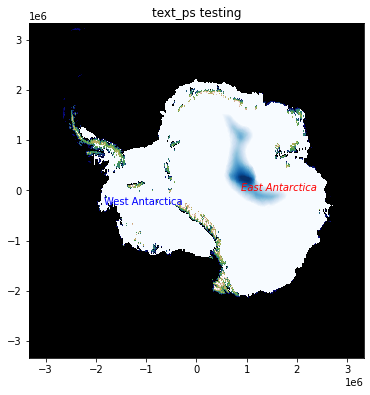

In [10]:
x = ds['x'].values
y = ds['y'].values
thick = ds['thickness'].values
thick2d = thick.reshape(13333, 13333)
surface = ds['surface'].values
surf2d = surface.reshape(13333, 13333)
surf2d = surf2d.astype('float')
surf2d[thick2d <= 0] = np.nan
bed = ds['bed'].values
bed2d = bed.reshape(13333, 13333)

fig = plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -100, vmax = 2000, cmap="gist_earth")
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 3500, vmax = 4000, cmap="Blues")
text_ps(-80, -105, 'West Antarctica', color = 'blue') #testing textps
text_ps(-75, 90, 'East Antarctica', fontstyle='italic', color='red', fontsize = 10.0)
plt.title('text_ps testing')

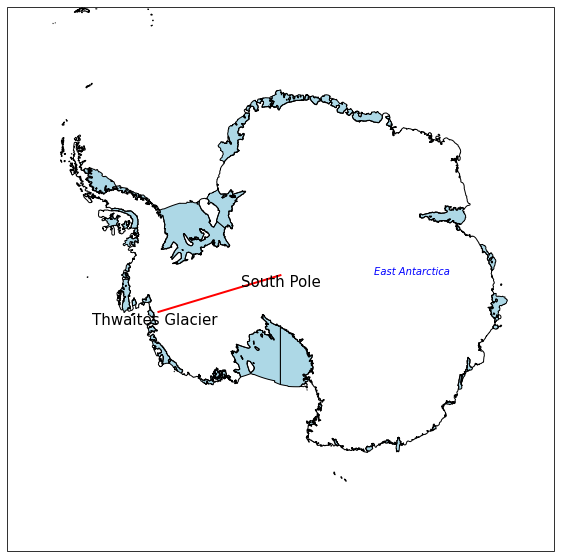

In [11]:
[mcmlat, mcmlon] = scar_loc('thwaites glacier')
ax = ant_bounds()
scar_label(ax, 'South Pole', fontsize = 15)
scar_label(ax, 'Thwaites Glacier', fontsize = 15)
plot_ps(ax, [-90, mcmlat], [0, mcmlon], color = 'red', linewidth = 2)
text_ps(-75, 90, 'East Antarctica', fontstyle='italic', color='blue')
plt.show()

Plot bed elevation data around mount vinson

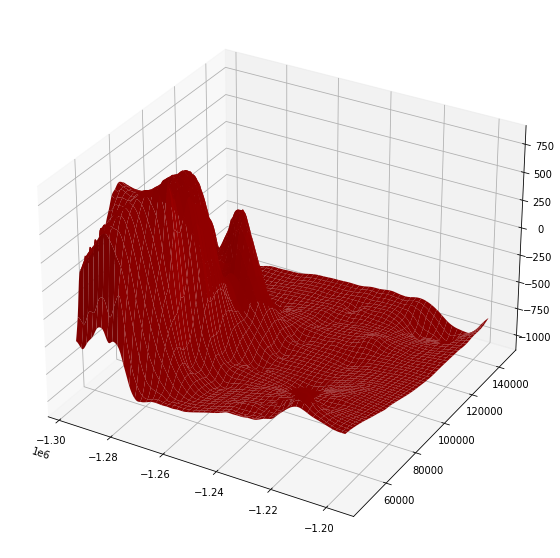

In [12]:
#%matplotlib notebook
centerlat, centerlon = scar_loc('mount vinson')
plot_3ps(centerlat, centerlon, ds['bed'].values, color = 'r')

Also bed elevation, but for Thwaites Glacier

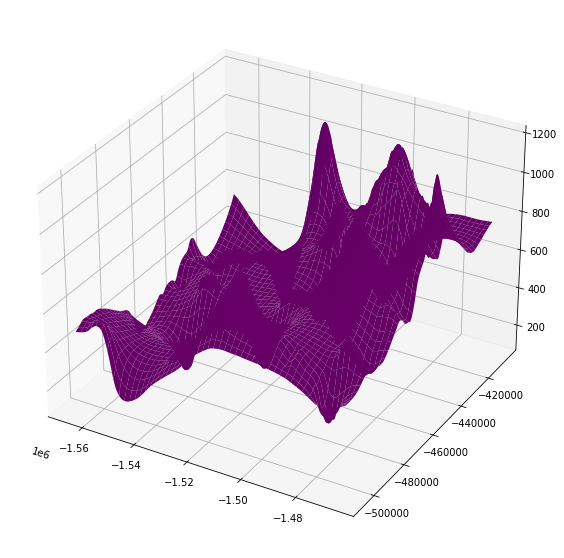

In [13]:
lat, lon = scar_loc('thwaites glacier')
plot_3ps(lat, lon, ds['bed'].values, color = 'm')

Bed elevation for Pine Island Glacier

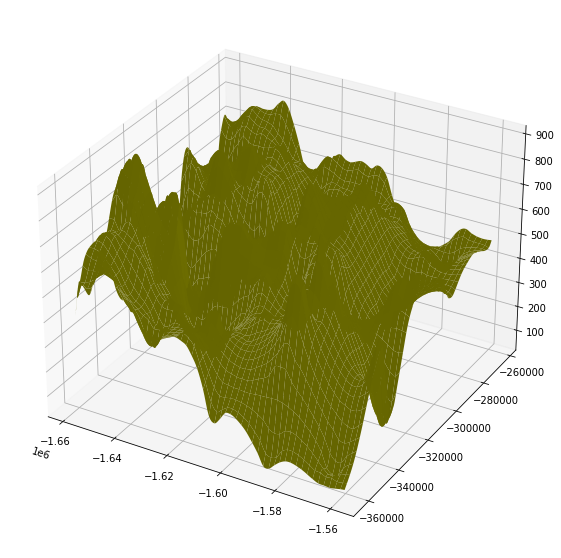

In [14]:
lat, lon = scar_loc('Pine Island Glacier')
plot_3ps(lat, lon, ds['bed'].values, color = 'y')

And lastly, bed elevation for Byrd Camp

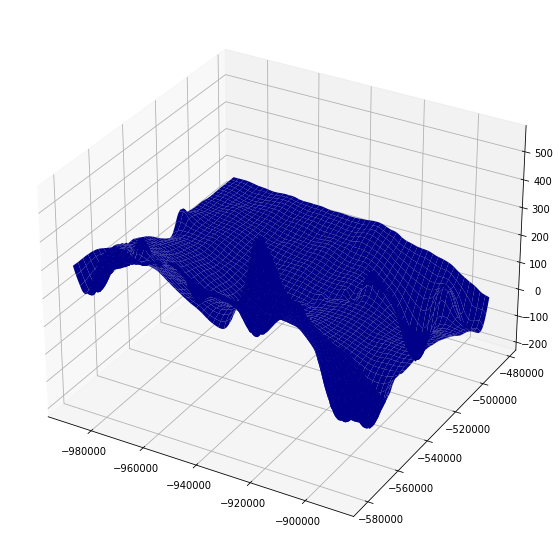

In [15]:
lat, lon = scar_loc('Byrd Camp')
plot_3ps(lat, lon, ds['bed'].values, color = 'b')

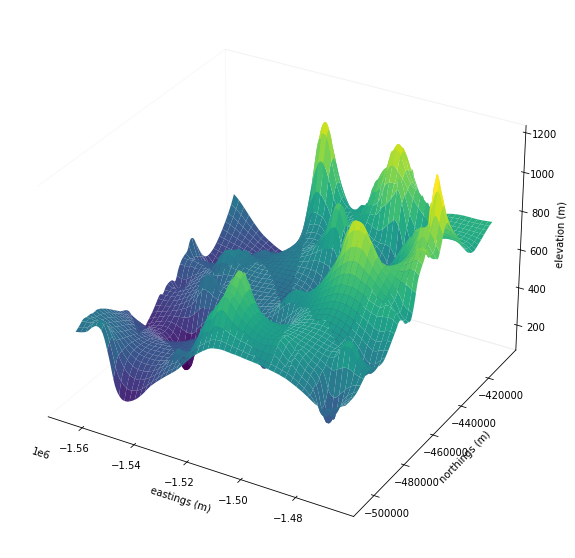

In [16]:
lat, lon = scar_loc('thwaites glacier')
surf_ps(lat, lon, ds['x'].values, ds['y'].values, ds['bed'].values, cmap = 'viridis')

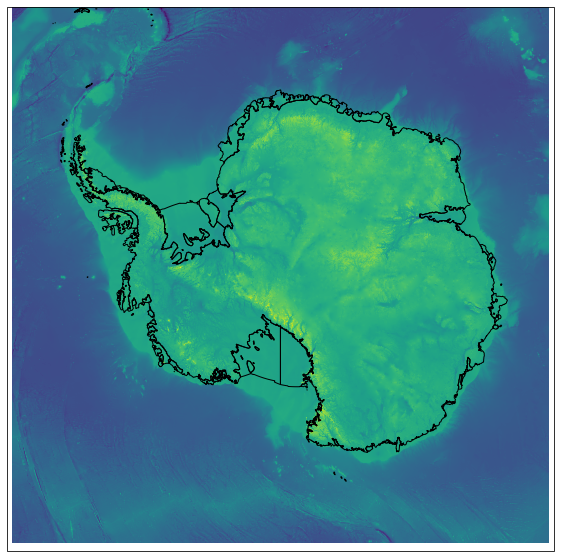

In [17]:
ax = ant_bounds()
pcolor_ps(ax, x, y, bed)
plt.show()

Example of the same functions, but on Greenland instead of Antarctica.

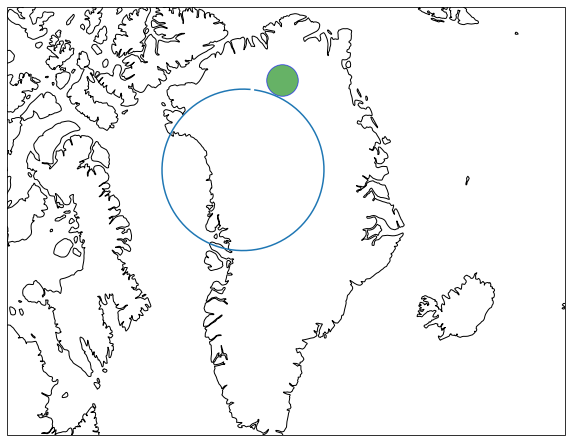

In [17]:
# will make the resolution for greenland better

ax = greenland_bounds()
circle_ps(ax, lats = 75, lons = -50, radii = 500, km = True)
scatter_ps(ax, 80, -40, s=1000, c='g', alpha = 0.6, edgecolors = 'b', linewidths = 0.9)
plt.show()

Example of quivermc

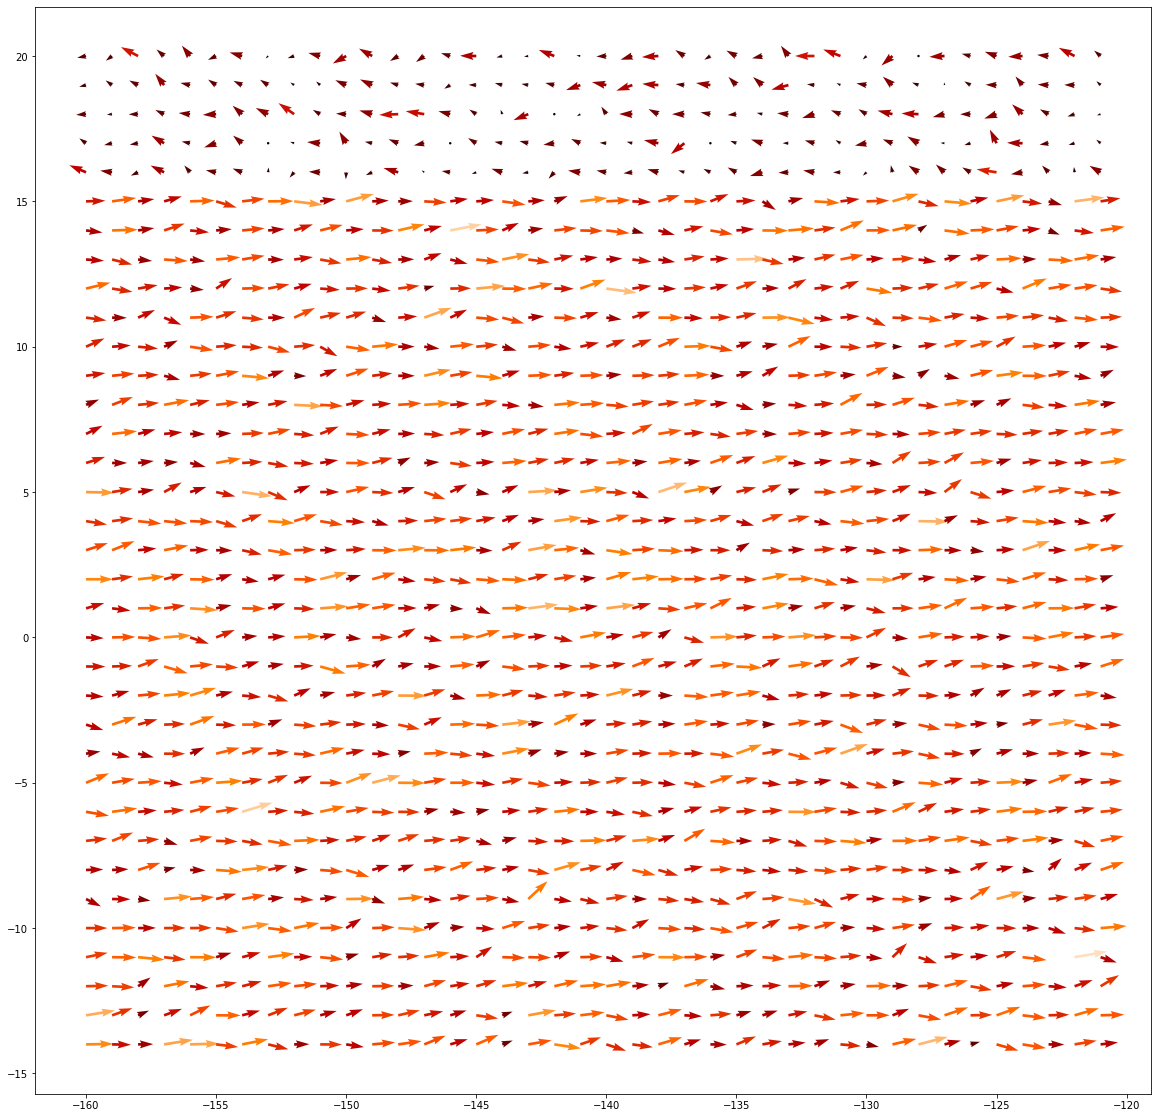

In [19]:
# Generate random data
u = np.random.rand(35, 40)
v = np.random.rand(35, 40)

# Modify the data
u[:30, :] += 5
u[30:, :] -= 3

# Add Gaussian noise to u and v
u += np.random.normal(0, 1, u.shape)
v += np.random.normal(0, 1, v.shape)

# Generate latitudes and longitudes
lat = np.flip(np.arange(20, -15, -1), axis=0)
lon = np.arange(-160, -120, 1)

quiver_mc(lat, lon, u, v, scale = 300, cmap = 'gist_heat')

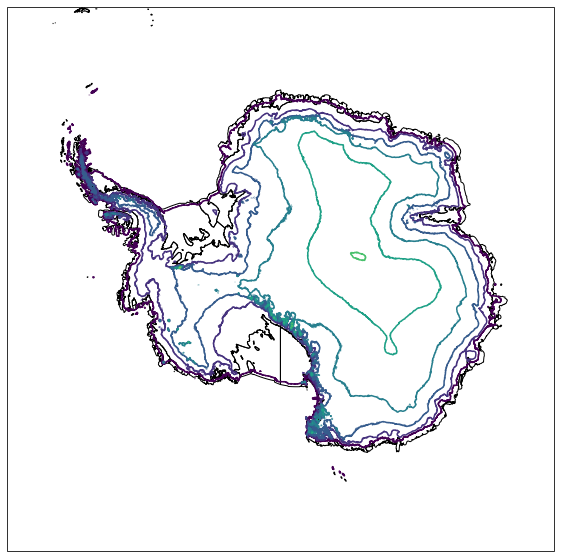

In [20]:
ax = ant_bounds()
contour_ps(x, y, surface, ax = ax)

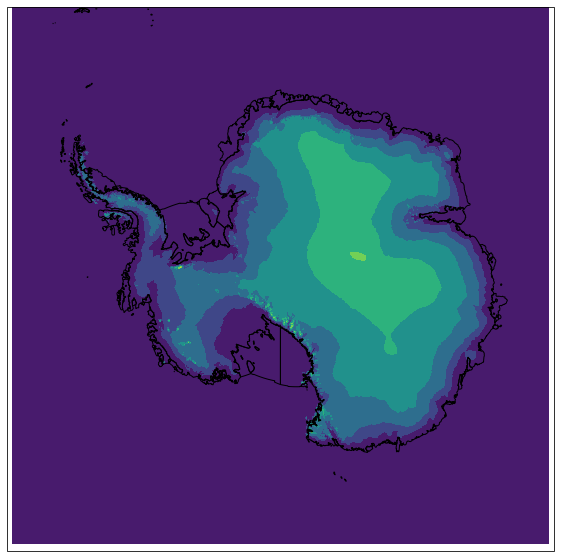

In [21]:
ax = ant_bounds()
contour_ps(x, y, surface, ax = ax, fill = True)